In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_curve, r2_score, auc
from sklearn.datasets import load_iris, load_wine
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, RandomForestRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
import mglearn
from sklearn.datasets import load_iris

Metrics for Iris dataset:
Logistic Regression:
  Accuracy: 0.9444444444444444
  Recall: 0.9444444444444444
  Precision: 0.9517543859649124

Random Forest:
  Accuracy: 0.9666666666666667
  Recall: 0.9666666666666667
  Precision: 0.9694444444444444

SVM:
  Accuracy: 0.9333333333333333
  Recall: 0.9333333333333333
  Precision: 0.9376932488043599



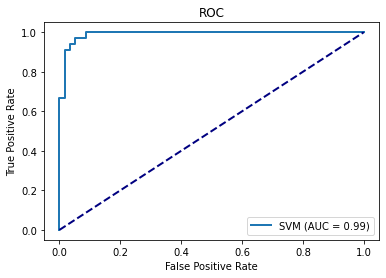

Voting (Hard):
  Accuracy: 0.9444444444444444
  Recall: 0.9444444444444444
  Precision: 0.9517543859649124

Voting (Soft):
  Accuracy: 0.9333333333333333
  Recall: 0.9333333333333333
  Precision: 0.9376932488043599



In [3]:
# QUESTION 2:
classifiers = [ (LogisticRegression(), "Logistic Regression"),
    (RandomForestClassifier(), "Random Forest"), (SVC(probability=True), "SVM"),
    (VotingClassifier(estimators=[('lr', LogisticRegression()), ('rf', RandomForestClassifier()),
        ('svc', SVC(probability=True))], voting='hard'), "Voting (Hard)"),
    (VotingClassifier(estimators=[('lr', LogisticRegression()), ('rf', RandomForestClassifier()),
        ('svc', SVC(probability=True))], voting='soft'), "Voting (Soft)") ]

dataset = load_iris()
features = dataset.data
target = dataset.target
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.6, random_state=0)

print("Metrics for Iris dataset:")
for clf, clf_name in classifiers:
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print(f"{clf_name}:")
    print(f"  Accuracy: {accuracy_score(Y_test, Y_pred)}")
    print(f"  Recall: {recall_score(Y_test, Y_pred, average='weighted')}")
    print(f"  Precision: {precision_score(Y_test, Y_pred, average='weighted')}")
    print()

    if clf_name == "SVM":
        probas_ = clf.predict_proba(X_test)
        fpr, tpr, _ = roc_curve(Y_test, probas_[:, 1], pos_label=1)
        roc_auc = auc(fpr, tpr)
        plt.figure()
        plt.plot(fpr, tpr, lw=2, label=f"SVM (AUC = {roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC')
        plt.legend(loc="lower right")
        plt.show()

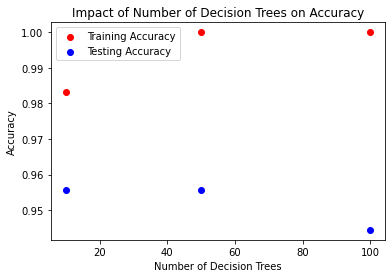

In [4]:
# Question3:
num_trees = [10, 50, 100]
dataset = load_iris()
features = dataset.data
target = dataset.target

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.6, random_state=0)

train_accuracy = []
test_accuracy = []

for n in num_trees:
    bagging_clf = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=n, random_state=0)
    bagging_clf.fit(X_train, y_train)

    y_train_pred = bagging_clf.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_accuracy.append(train_acc)

    y_test_pred = bagging_clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_accuracy.append(test_acc)

# Plotting
plt.scatter(num_trees, train_accuracy, label="Training Accuracy", color='red')
plt.scatter(num_trees, test_accuracy, label="Testing Accuracy", color='blue')
plt.xlabel("Number of Decision Trees")
plt.ylabel("Accuracy")
plt.title("Impact of Number of Decision Trees on Accuracy")
plt.legend()
plt.show()

In [5]:
# QUESTION 5:
# BOSTON DATASET
x, y = mglearn.datasets.load_extended_boston()
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.4, random_state=42)
# WAVE DATASET
x, y = mglearn.datasets.make_wave(n_samples=100)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.4, random_state=42)

datasets = [ ("*** BOSTON DATASET ***", x_train1, x_test1, y_train1, y_test1),
             ("*** WAVES DATASET ***", x_train2, x_test2, y_train2, y_test2)]

for dataset_name, x_train, x_test, y_train, y_test in datasets:
    print(f"{dataset_name}")
    # Linear Regression
    linear_reg = LinearRegression()
    linear_reg.fit(x_train, y_train)
    y_pred_linear = linear_reg.predict(x_test)
    print("Linear Regression:")
    print("R2 score               : ", round(r2_score(y_test, y_pred_linear), 2))
    print("Mean Relative Error (%): ", round(np.mean(np.abs((y_test - y_pred_linear) / y_test)) * 100, 2))
    print()
    # Random Forest Regression
    rf_reg = RandomForestRegressor(random_state=42)
    rf_reg.fit(x_train, y_train)
    y_pred_rf = rf_reg.predict(x_test)
    print("Random Forest Regression:")
    print("R2 score               : ", round(r2_score(y_test, y_pred_rf), 2))
    print("Mean Relative Error (%): ", round(np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100, 2))
    print()

*** BOSTON DATASET ***
Linear Regression:
R2 score               :  0.72
Mean Relative Error (%):  15.97

Random Forest Regression:
R2 score               :  0.86
Mean Relative Error (%):  11.26

*** WAVES DATASET ***
Linear Regression:
R2 score               :  0.65
Mean Relative Error (%):  90.95

Random Forest Regression:
R2 score               :  0.82
Mean Relative Error (%):  69.96



In [6]:
# QUESTION6
from sklearn.datasets import load_iris, load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score

classifiers = [ (RandomForestClassifier(random_state=0), "Random Forest"),
                (AdaBoostClassifier(random_state=0), "AdaBoost"),
                (GradientBoostingClassifier(random_state=0), "Gradient Boosting")]

for dataset, dataset_name in [(load_iris(), "Iris"),(load_wine(), "Wine")]:
    features = dataset.data
    target = dataset.target
    X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.6, random_state=0)

    print(f"\n*** {dataset_name} Dataset ***")
    for classifier, classifier_name in classifiers:
        classifier.fit(X_train, Y_train)
        Y_pred = classifier.predict(X_test)

        print(f"{classifier_name}:")
        print(f"  Accuracy: {accuracy_score(Y_test, Y_pred):.3f}")
        print(f"  Recall: {recall_score(Y_test, Y_pred, average='weighted'):.3f}")
        print(f"  Precision: {precision_score(Y_test, Y_pred, average='weighted'):.3f}")


*** Iris Dataset ***
Random Forest:
  Accuracy: 0.956
  Recall: 0.956
  Precision: 0.960
AdaBoost:
  Accuracy: 0.967
  Recall: 0.967
  Precision: 0.967
Gradient Boosting:
  Accuracy: 0.956
  Recall: 0.956
  Precision: 0.960

*** Wine Dataset ***
Random Forest:
  Accuracy: 0.963
  Recall: 0.963
  Precision: 0.966
AdaBoost:
  Accuracy: 0.897
  Recall: 0.897
  Precision: 0.903
Gradient Boosting:
  Accuracy: 0.897
  Recall: 0.897
  Precision: 0.900


In [7]:
# QUESTION 7:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

iris_dataset = load_iris()
X, y = iris_dataset.data, iris_dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for max_depth in [2, 3, 4]:
    for learning_rate in [0.1, 0.05]:
        gb_classifier = GradientBoostingClassifier(max_depth=max_depth, learning_rate=learning_rate, random_state=42)
        gb_classifier.fit(X_train, y_train)
        y_pred = gb_classifier.predict(X_test)
        print(f"\nMaximum Depth: {max_depth} and Learning Rate: {learning_rate} with Accuracy: {accuracy_score(y_test, y_pred):.3f}")


Maximum Depth: 2 and Learning Rate: 0.1 with Accuracy: 1.000

Maximum Depth: 2 and Learning Rate: 0.05 with Accuracy: 1.000

Maximum Depth: 3 and Learning Rate: 0.1 with Accuracy: 1.000

Maximum Depth: 3 and Learning Rate: 0.05 with Accuracy: 1.000

Maximum Depth: 4 and Learning Rate: 0.1 with Accuracy: 1.000

Maximum Depth: 4 and Learning Rate: 0.05 with Accuracy: 1.000
